## Figure 5

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(grid))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(arrow))

Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘patchwork’ was built under R version 4.2.3”
Warning message:
“package ‘RColorBrewer’ was built under R version 4.2.3”
Warning message:
“package ‘arrow’ was built under R version 4.2.3”


In [2]:
figure_dir <- "../figures"
output_main_figure_5 <- file.path(
    figure_dir, "main_figure_5_top_feature_montages.png"
)

## Load in top two features image montages (Radial Distribution in nuclei and mito)

### Top coefficient feature (distribution nuclei stain in nuclei) max montage

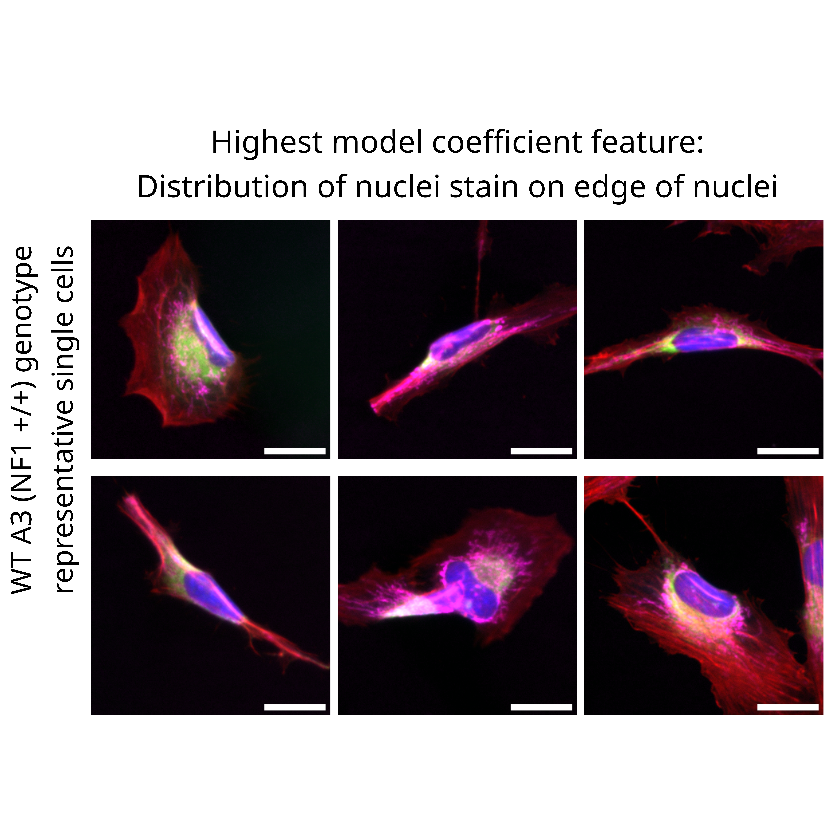

In [3]:
top_feat_path_max = file.path("./nuclei_radial_feature_montage_max.png")
top_feat_img_max = png::readPNG(top_feat_path_max)

# Get the dimensions of the image
img_height <- nrow(top_feat_img_max)
img_width <- ncol(top_feat_img_max)

# Calculate the aspect ratio
aspect_ratio <- img_height / img_width

# Plot the image montage to a ggplot object
top_feat_montage_max <- ggplot() +
  annotation_custom(
    rasterGrob(top_feat_img_max, interpolate = TRUE),
    xmin = -Inf, xmax = Inf, ymin = -Inf, ymax = Inf
  ) +
  theme_void() +
  coord_fixed(ratio = aspect_ratio, clip = "off") +
  theme(plot.margin = margin(0, 0, 0, 0, "cm"))  # Adjust margins as needed

top_feat_montage_max

### Top coefficient feature (distribution nuclei stain in nuclei) min montage

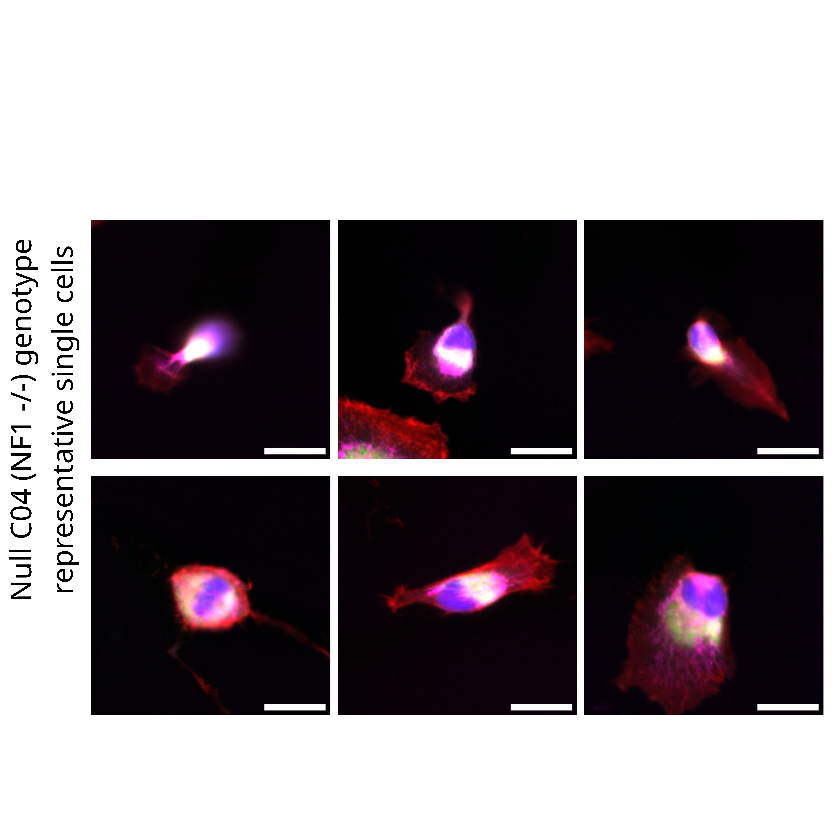

In [4]:
top_feat_path_min = file.path("./nuclei_radial_feature_montage_min.png")
top_feat_img_min = png::readPNG(top_feat_path_min)

# Get the dimensions of the image
img_height <- nrow(top_feat_img_min)
img_width <- ncol(top_feat_img_min)

# Calculate the aspect ratio
aspect_ratio <- img_height / img_width

# Plot the image montage to a ggplot object
top_feat_montage_min <- ggplot() +
  annotation_custom(
    rasterGrob(top_feat_img_min, interpolate = TRUE),
    xmin = -Inf, xmax = Inf, ymin = -Inf, ymax = Inf
  ) +
  theme_void() +
  coord_fixed(ratio = aspect_ratio, clip = "off") +
  theme(plot.margin = margin(0, 0, 0, 0, "cm"))  # Adjust margins as needed

top_feat_montage_min

### Second top coefficient (mito distribution in nuclei) max montage

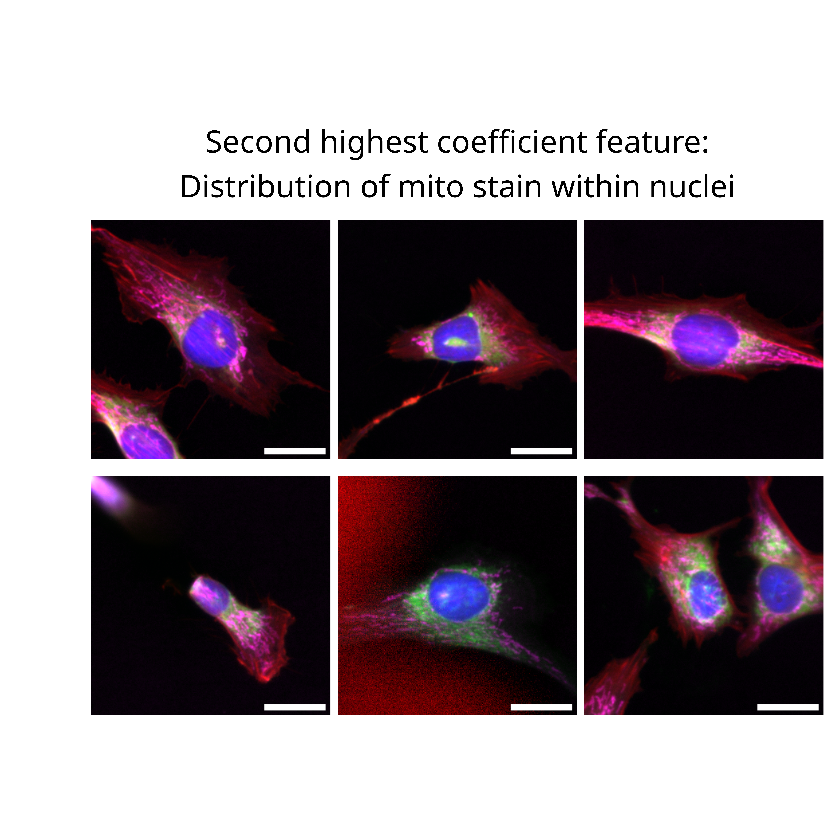

In [5]:
second_top_feat_path_max = file.path("./mito_radial_feature_montage_max.png")
second_top_feat_img_max = png::readPNG(second_top_feat_path_max)

# Get the dimensions of the image
img_height <- nrow(second_top_feat_img_max)
img_width <- ncol(second_top_feat_img_max)

# Calculate the aspect ratio
aspect_ratio <- img_height / img_width

# Plot the image montage to a ggplot object
second_top_montage_max <- ggplot() +
  annotation_custom(
    rasterGrob(second_top_feat_img_max, interpolate = TRUE),
    xmin = -Inf, xmax = Inf, ymin = -Inf, ymax = Inf
  ) +
  theme_void() +
  coord_fixed(ratio = aspect_ratio, clip = "off") +
  theme(plot.margin = margin(0, 0, 0, 0, "cm"))  # Set margins to zero
second_top_montage_max


### Second top coefficient (mito distribution in nuclei) min montage

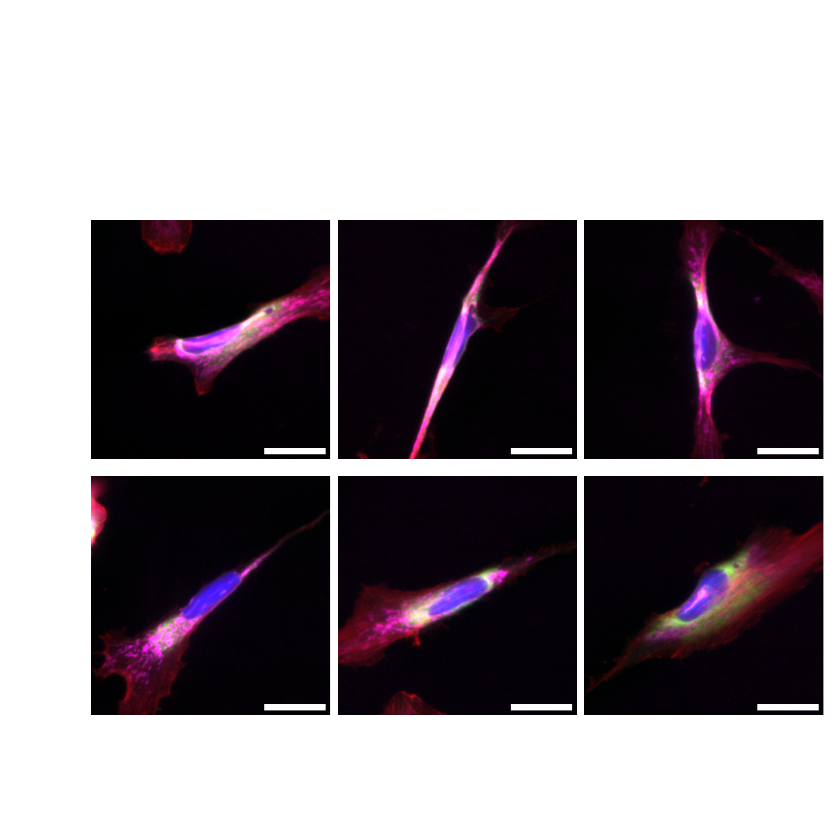

In [6]:
second_top_feat_path_min = file.path("./mito_radial_feature_montage_min.png")
second_top_feat_img_min = png::readPNG(second_top_feat_path_min)

# Get the dimensions of the image
img_height <- nrow(second_top_feat_img_min)
img_width <- ncol(second_top_feat_img_min)

# Calculate the aspect ratio
aspect_ratio <- img_height / img_width

# Plot the image montage to a ggplot object
second_top_montage_min <- ggplot() +
  annotation_custom(
    rasterGrob(second_top_feat_img_min, interpolate = TRUE),
    xmin = -Inf, xmax = Inf, ymin = -Inf, ymax = Inf
  ) +
  theme_void() +
  coord_fixed(ratio = aspect_ratio, clip = "off") +
  theme(plot.margin = margin(0, 0, 0, 0, "cm"))  # Adjust margins as needed

second_top_montage_min

## Generate main figure 5

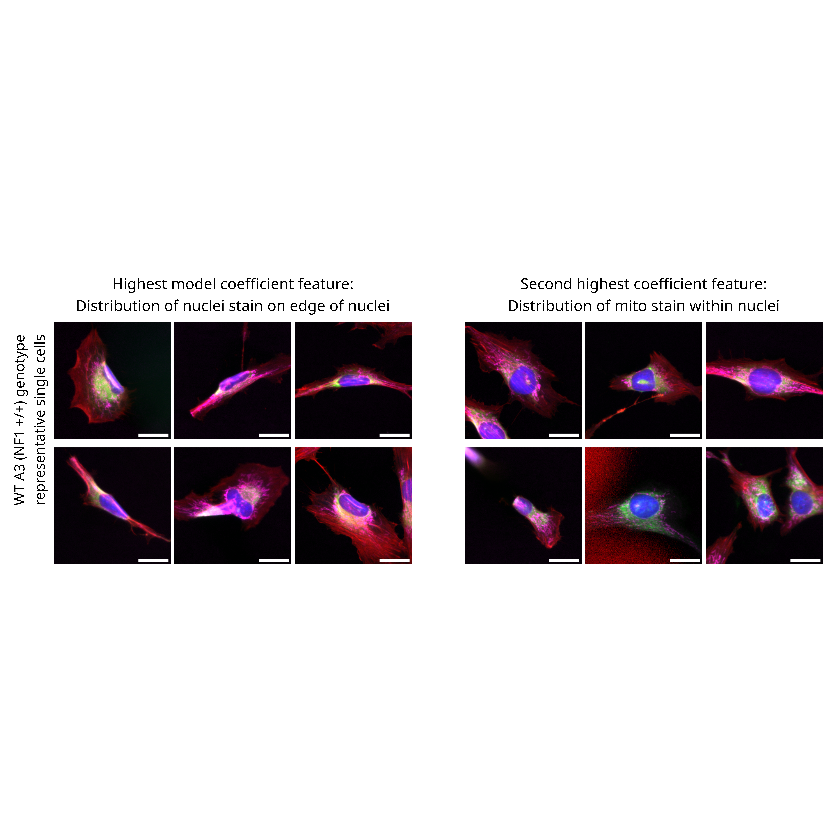

In [7]:
top_row_montage <- (
   free(top_feat_montage_max) +
   second_top_montage_max
) + plot_layout(widths = c(1,1), guides = "collect")

top_row_montage


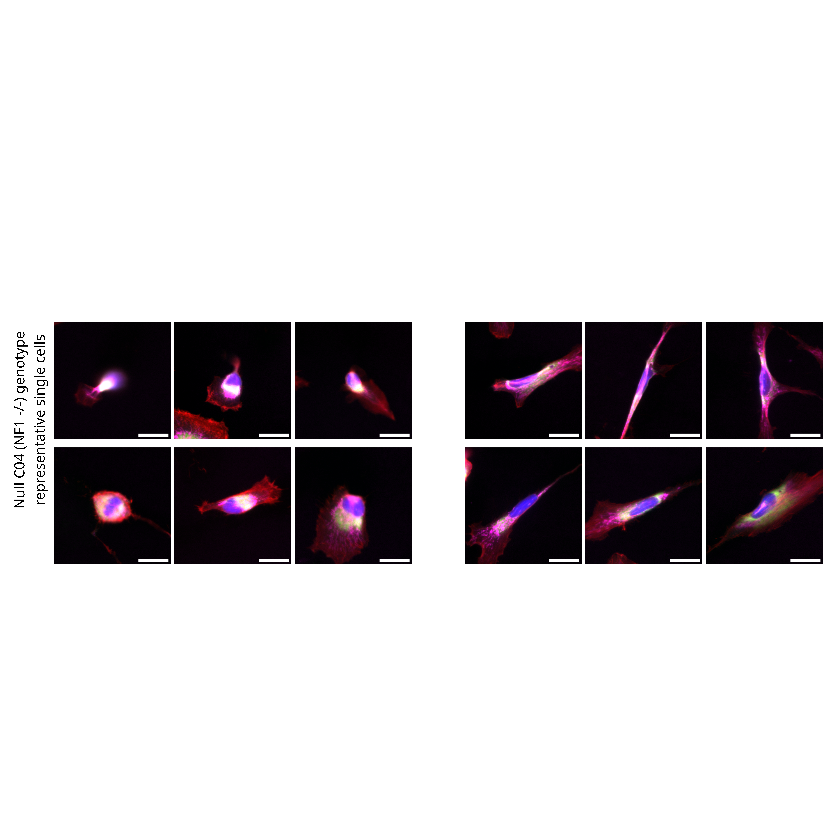

In [8]:
bottom_row_montage <- (
   top_feat_montage_min +
   second_top_montage_min
) + plot_layout(widths = c(1,1), guides = "collect")

bottom_row_montage

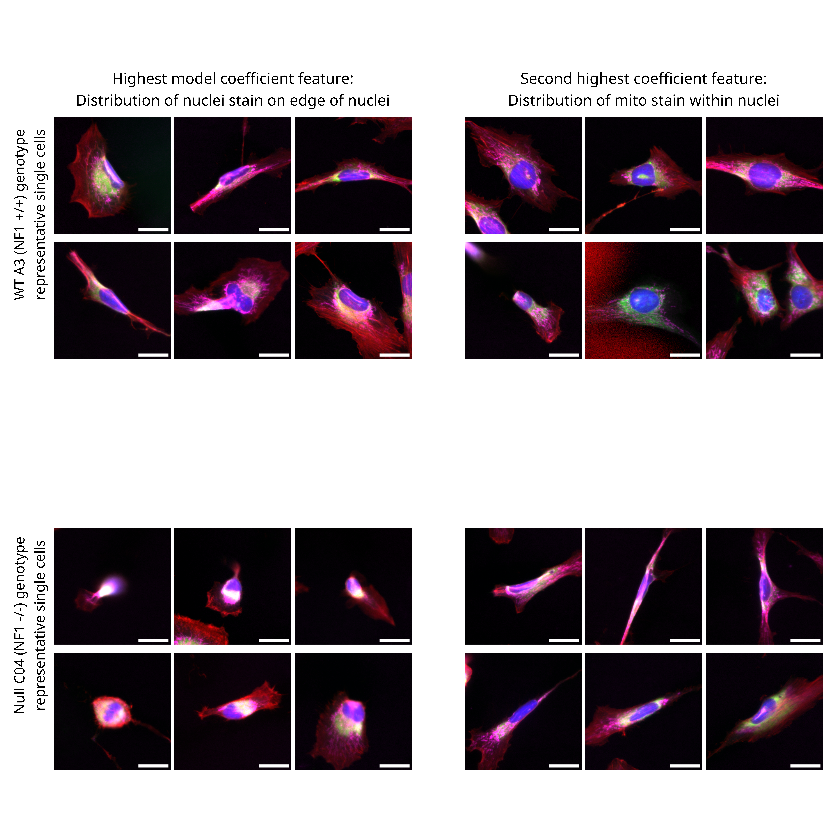

In [9]:
align_plot <- (
    top_row_montage /
    bottom_row_montage
) + plot_layout(heights = c(1.0, 1.0))

align_plot

In [10]:
fig_5_gg <- (
  align_plot
) + plot_annotation(tag_levels = list(c("A", "B", "", ""))) & theme(plot.tag = element_text(size = 30))

# Save or display the plot
ggsave(output_main_figure_5, plot = fig_5_gg, dpi = 500, height = 16, width = 22)